In [118]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

figure_directory = '../report/figures/'


## Function Definitions

In [119]:
def resistance(Vsample):
    Vgenerator = 5 #uV
    resistor = 1000  # Ohms
    return Vsample/Vgenerator*resistor  # uOhms

def resistivity(res, f = 1 ):
    thickness = 2/1000  # mm -> m
    return (np.pi * thickness )/ np.log(2) * f * res


In [120]:
def temp_resistivity_plot(data, name):
    temperatureDF = pd.read_csv( data )

    temperatureDF['resistance'] = resistance(temperatureDF['volt'])
    temperatureDF['resistivity'] = resistivity(temperatureDF['resistance'])

    min = temperatureDF['volt'] - temperatureDF['vmin']
    min = resistivity( resistance( min.to_numpy() ) )
    max = temperatureDF['vmax'] - temperatureDF['volt']
    max = resistivity( resistance( max.to_numpy() ) )
    y_err = np.array([min,max])

    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'serif'

    ax = temperatureDF.plot.scatter(x = 'temp', y = 'resistivity') #uV

    (_, caps, _) = plt.errorbar(temperatureDF['temp'], temperatureDF['resistivity'],\
                                yerr= y_err, capsize = 5,)
    for cap in caps:
        cap.set_markeredgewidth(1)


    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.set_title('Resistivity of ' + name, fontsize = 24)
    ax.set_xlabel('Temperature (K)', fontsize = 24)
    ax.set_ylabel(r'$\rho$ ($\mu\Omega\cdot$ m)', fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)

    fig = ax.get_figure()
    return fig

    #plt.savefig(figure_directory + fname +'temperatureDF_resistivity.pgf')

In [121]:
def magnetic_field_plot(data, name):
    df = pd.read_csv(data)

    df['resistance0'] = resistance(df['volt0'])
    df['resistivity0'] = resistivity(df['resistance0'])
    df['resistance8'] = resistance(df['volt8'])
    df['resistivity8'] = resistivity(df['resistance8'])

    y_err = np.full_like(df['resistance0'], 0.05)
    y_err = resistivity(  resistance(y_err)  )
    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'serif'


    fig , ax = plt.subplots()

    ax.scatter(x = df['temp'], y = df['resistivity0'], \
                                label = 'B = 0 mT') #uV
    ax.scatter(x = df['temp'], y = df['resistivity8'], \
                                label = 'B = 8 mT') #uV

    (_, caps0, _) = plt.errorbar(df['temp'], df['resistivity0'],\
                                yerr= y_err, capsize = 5,)
    for cap in caps0:
        cap.set_markeredgewidth(1)

    (_, caps8, _) = plt.errorbar(df['temp'], df['resistivity8'],\
                                yerr= y_err, capsize = 5,)
    for cap in caps8:
        cap.set_markeredgewidth(1)


    ax.legend()
    ax.set_title('Magnetic Field Dependent \n Resistivity of ' + name, fontsize = 24)
    ax.set_xlabel('Temperature (K)', fontsize = 24)
    ax.set_ylabel(r'$\rho$ ($\mu\Omega\cdot$ m)', fontsize = 24)
    ax.tick_params(axis='both', labelsize = 20)
    ax.legend(fontsize = 20)

    return fig
    #plt.savefig(figure_directory + fname +'mag_resistivity.pgf')

## Voltage at Reference Frequencies

TODO redo the error bars such that its not from a standard deviation and rather just the min and max we measured.

discuss diode effect in resistance measurement at 300 k


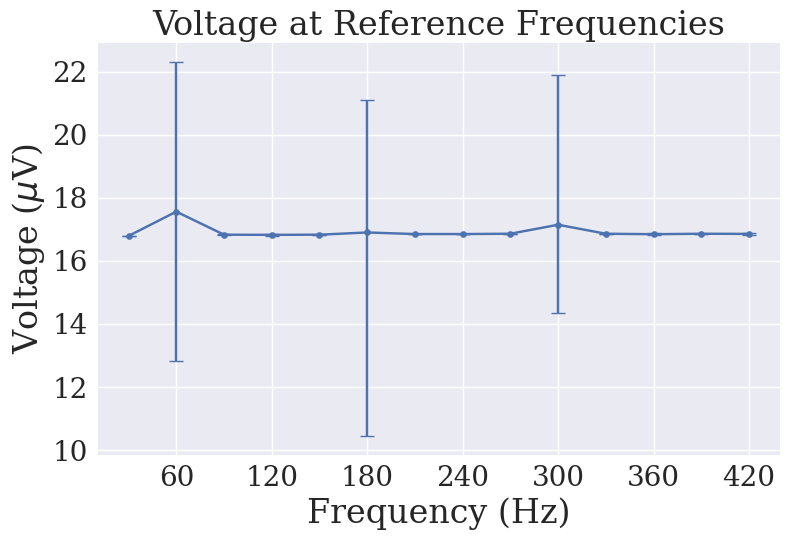

In [127]:
lockinDF = pd.read_csv("LockInAmp.csv")
lockinDF.columns = ['freq','min','max','avg']

min = lockinDF['avg'] - lockinDF['min']
min = min.to_numpy()
max = lockinDF['max'] - lockinDF['avg']
max = max.to_numpy()
y_err = np.array([min,max])

plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'

ax = lockinDF.plot.scatter(x = 'freq', y = 'avg', fontsize=20)
(_, caps, _) = plt.errorbar(lockinDF['freq'], lockinDF['avg'], yerr= y_err, capsize = 5)
for cap in caps:
    cap.set_markeredgewidth(1)


ax.xaxis.set_major_locator(plt.MultipleLocator(60))
plt.title('Voltage at Reference Frequencies', fontsize = 24)
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.ylabel('Voltage ($\mu$V)', fontsize=24)
plt.tight_layout()
ax.tick_params(axis='both', which='both', direction = 'in')


plt.savefig(figure_directory + 'lockin_frequency_dependence.pgf')
plt.savefig(figure_directory + 'lockin_frequency_dependence.png')


## Temperature Dependence

#### $Bi_2Sr_2CaCu_2O_8$

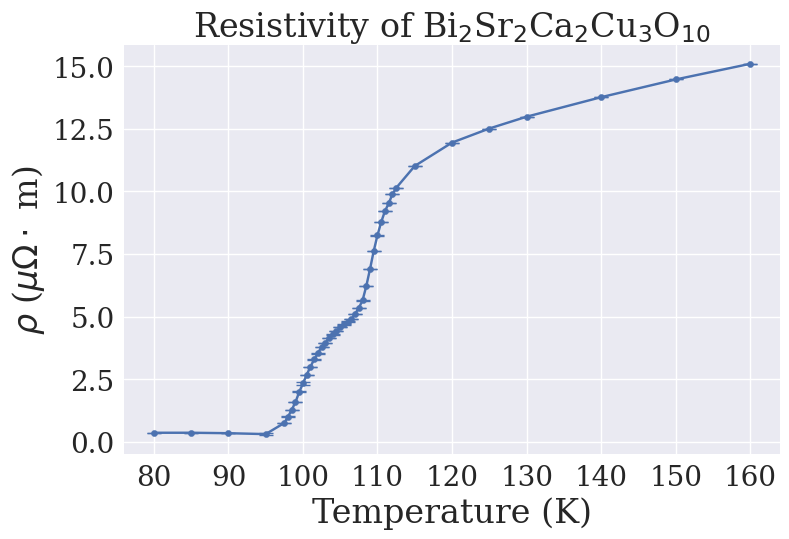

In [128]:
data = 'bscco_temp_volt.csv'
name = 'Bi$_2$Sr$_2$Ca$_2$Cu$_3$O$_{10}$'
fname = 'bscco'

bscco_fig = temp_resistivity_plot(data,name)
bscco_fig.set_tight_layout(True)
bscco_fig.savefig(figure_directory + fname + '_temp_resistivity.pgf')
bscco_fig.savefig(figure_directory + fname + '_temp_resistivity.png')


### $YBa_2Cu_3O_7$

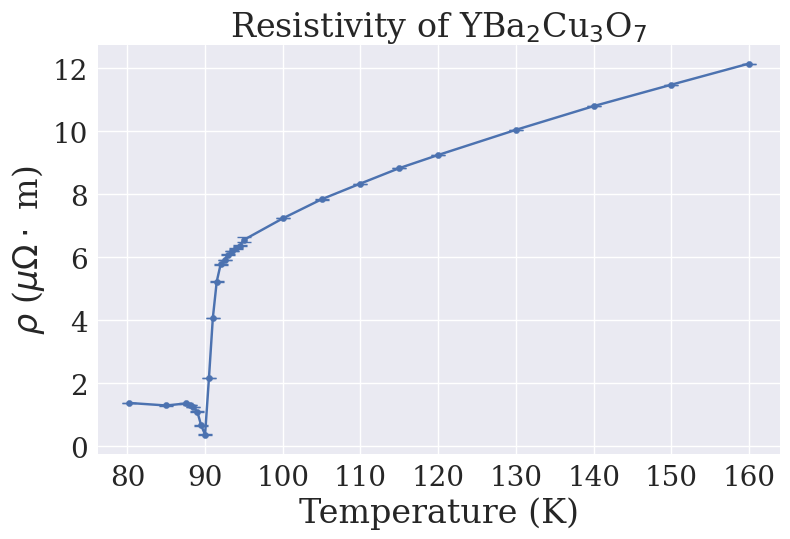

In [131]:
data = 'ybco_temp_volt.csv'
name = 'YBa$_2$Cu$_3$O$_7$'
fname = 'ybco'

ybco_fig = temp_resistivity_plot(data,name)
ybco_fig.set_tight_layout(True)
ybco_fig.savefig(figure_directory + fname + '_temp_resistivity.pgf')
ybco_fig.savefig(figure_directory + fname + '_temp_resistivity.png')

## Magnetic Field Dependence

#### $Bi_2Sr_2CaCu_2O_8$

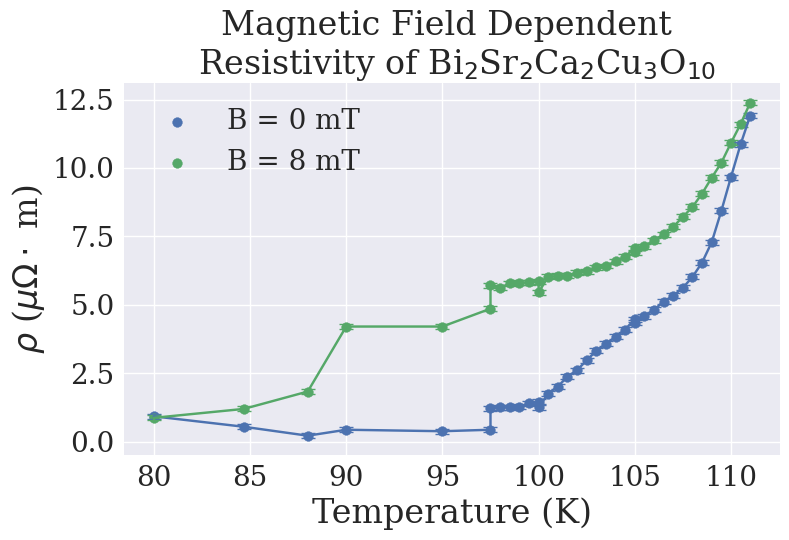

In [132]:
data = 'bscco_mag_temp_volt.csv'
name = 'Bi$_2$Sr$_2$Ca$_2$Cu$_3$O$_{10}$'
fname = 'bscco'
bscco_mag_fig = magnetic_field_plot(data, name)
bscco_mag_fig.set_tight_layout(True)
bscco_mag_fig.savefig(figure_directory + fname + '_mag_resistivity.pgf')
bscco_mag_fig.savefig(figure_directory + fname + '_mag_resistivity.png')

Why the offset? I believe part of it is that we didn't measure low enough temperatures. Besides the human error the applied magnetic field interrupts the formation of cooper pairs therefore we need to reach lower temperatures to truly be in the super conducting regime. This is effectively like shifting the curve to the left. 

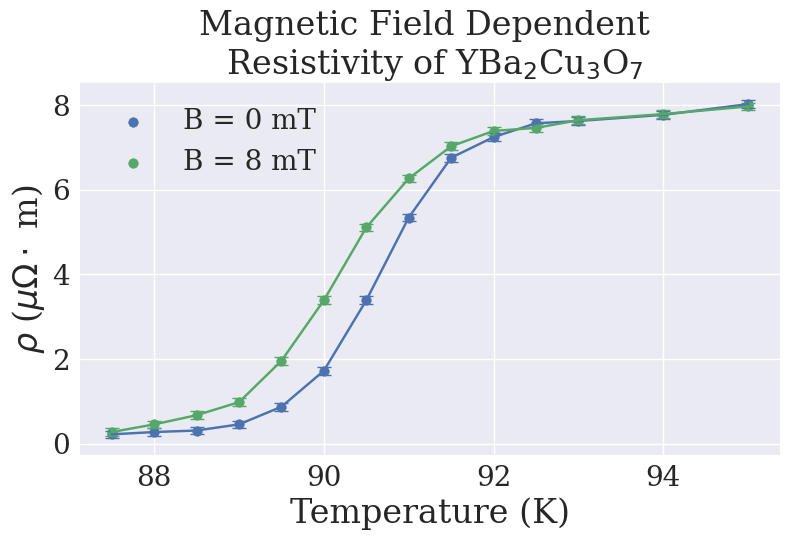

In [130]:
data = 'ybco_mag_temp_volt.csv'
name = 'YBa$_2$Cu$_3$O$_7$'
fname = 'ybco'

ybco_mag_fig = magnetic_field_plot(data,name)
ybco_mag_fig.set_tight_layout(True)
ybco_mag_fig.savefig(figure_directory + fname + '_mag_resistivity.pgf')
ybco_mag_fig.savefig(figure_directory + fname + '_mag_resistivity.png')